In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('Walmart_Sales.csv', encoding='unicode_escape')

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
df.shape

(6435, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

In [22]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [31]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [23]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [33]:
df['year'] = df['Date'].dt.year

In [50]:
df['month'] = df['Date'].dt.month

Text(0, 0.5, 'Total Sales')

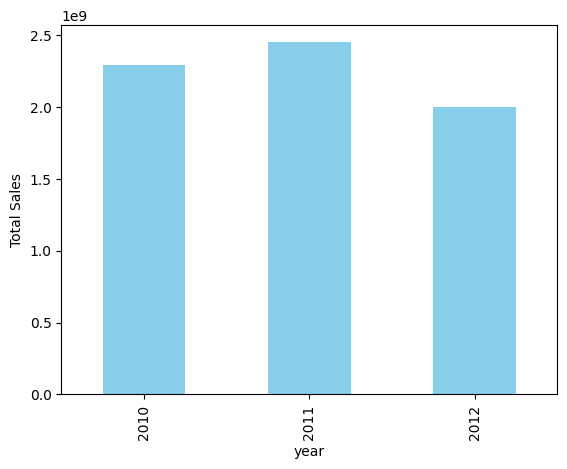

In [120]:
df.groupby('year')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'skyblue')
plt.ylabel('Total Sales')

### Most weekly sales has been done on 2011.

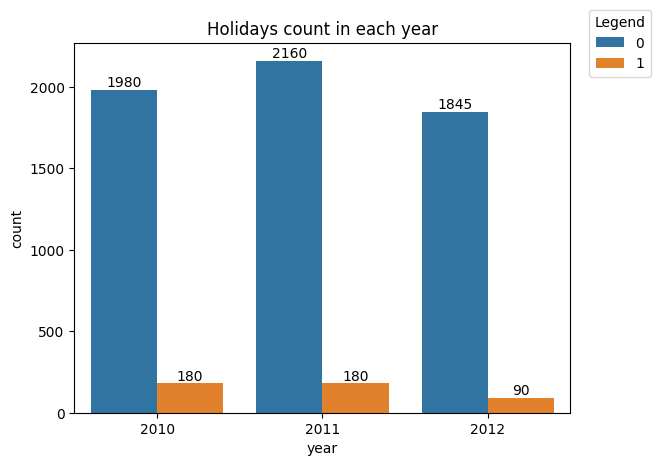

In [137]:
ax = sns.countplot(x = 'year', data =df, hue = 'Holiday_Flag')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Holidays count in each year')
plt.legend(loc='center', bbox_to_anchor=(1.1,1), title='Legend')


Text(0, 0.5, 'Total Weekly Sales')

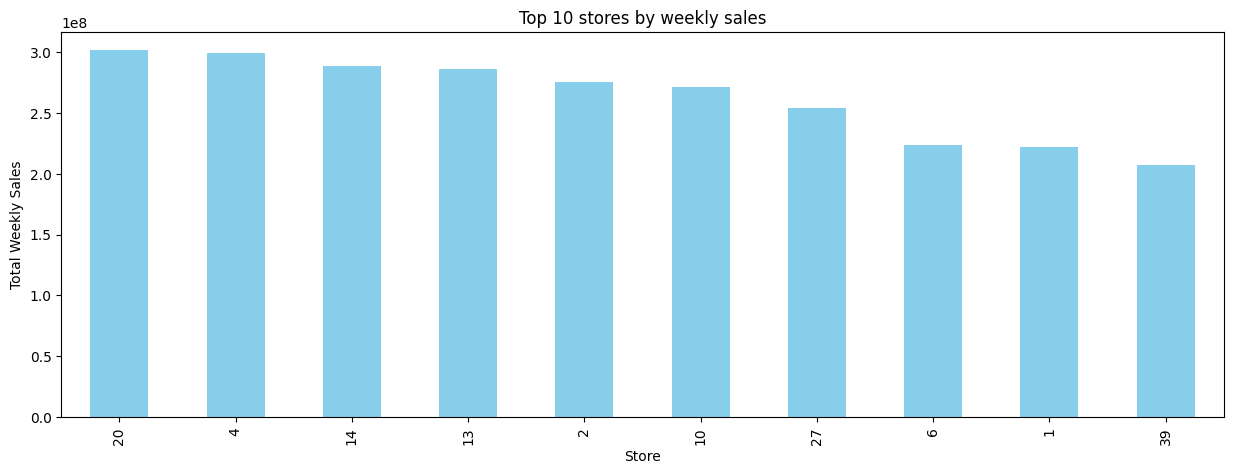

In [123]:
plt.figure(figsize = (15,5))
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 stores by weekly sales')
plt.ylabel('Total Weekly Sales')

### Top 10 stores by weekly sales.

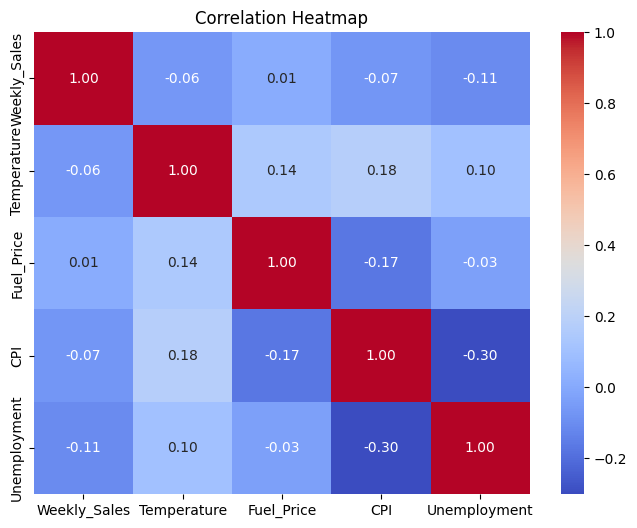

In [49]:
correlation = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Average weekly sales each month')

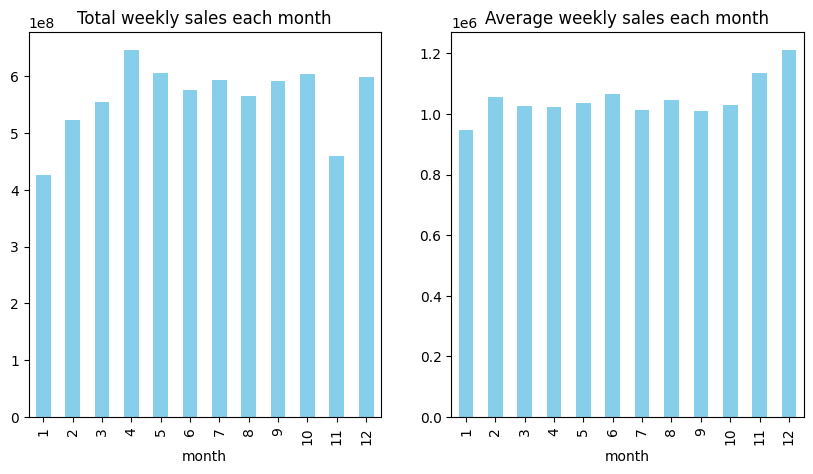

In [62]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
df.groupby('month')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'Skyblue')
plt.title('Total weekly sales each month')

plt.subplot(122)
df.groupby('month')['Weekly_Sales'].mean().plot(kind = 'bar', color = 'Skyblue')
plt.title('Average weekly sales each month')

### April has the most total weekly sales and December has the most average weekly sales.

In [63]:
avg_sales_over_time = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

<Axes: title={'center': 'Weekly Sales over time'}, xlabel='Date', ylabel='Weekly_Sales'>

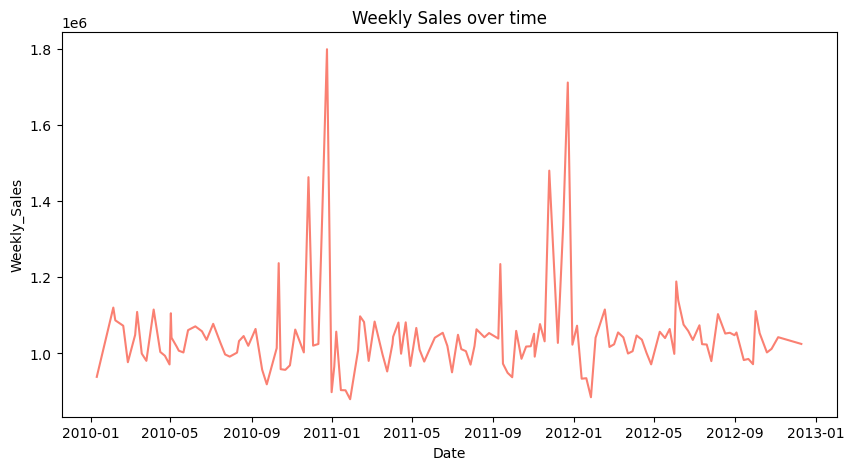

In [128]:
plt.figure(figsize=(10, 5))
plt.title('Weekly Sales over time')
sns.lineplot(data=avg_sales_over_time,x='Date', y='Weekly_Sales', color='salmon')

Text(0.5, 0, 'Temperature')

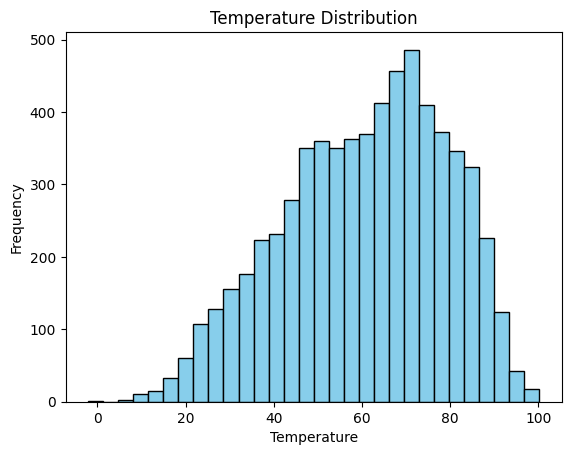

In [118]:
df['Temperature'].plot(kind = 'hist', bins =30,  edgecolor='black', color = 'skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')

In [71]:
def whether(temp):
    if temp < 32:
        return 'very_cold'
    elif temp > 32 and temp <50:
        return 'cold'
    elif temp > 50 and temp< 80:
        return 'normal'
    elif temp > 80 :
        return 'hot'
    
df['whether'] = df['Temperature'].apply(whether)

Text(0, 0.5, 'Anerage weekly sales')

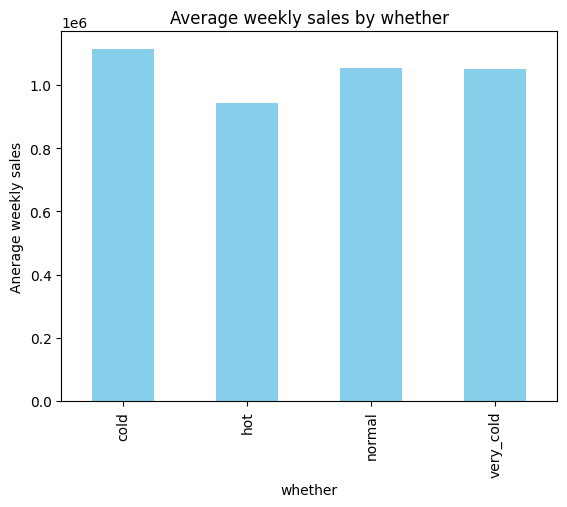

In [119]:
df.groupby('whether')['Weekly_Sales'].mean().plot(kind = 'bar',color = 'skyblue')
plt.title('Average weekly sales by whether')
plt.ylabel('Anerage weekly sales')

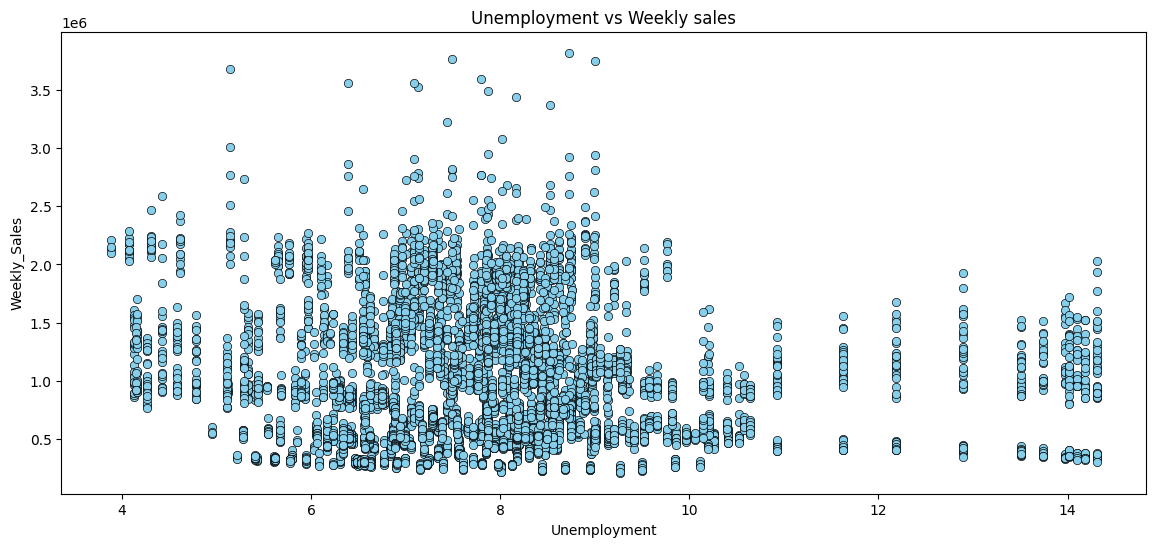

In [126]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', color = 'skyblue', edgecolor = 'black')
plt.title('Unemployment vs Weekly sales')
plt.show()

### Sales decreases as the unemployment percentage increases.

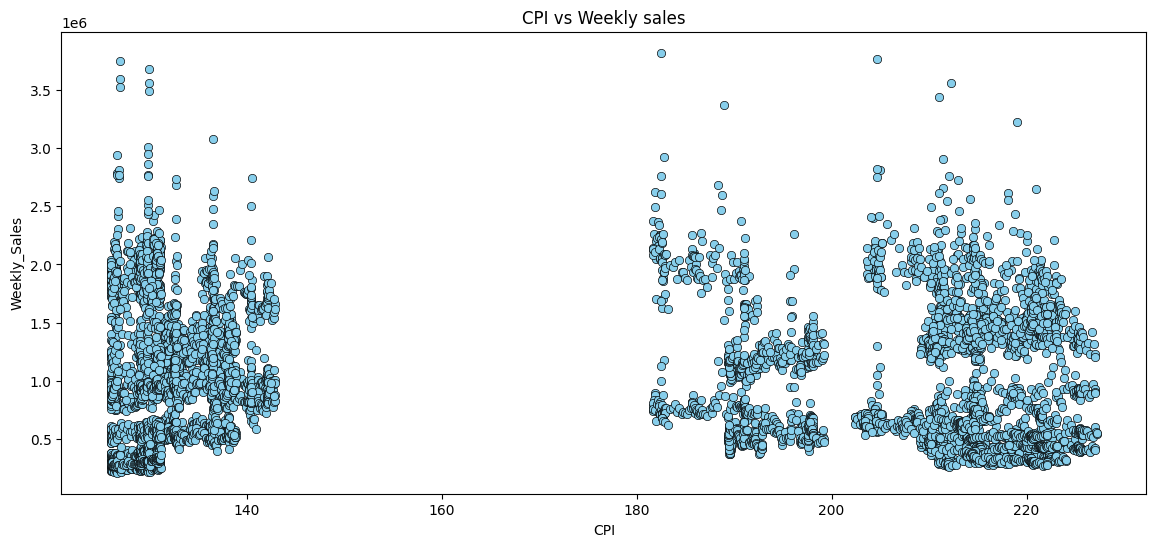

In [125]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = df, x = 'CPI',y = 'Weekly_Sales',color = 'skyblue',edgecolor = 'black')
plt.title('CPI vs Weekly sales')

plt.show()

### CPI affects the Weekly Sales.

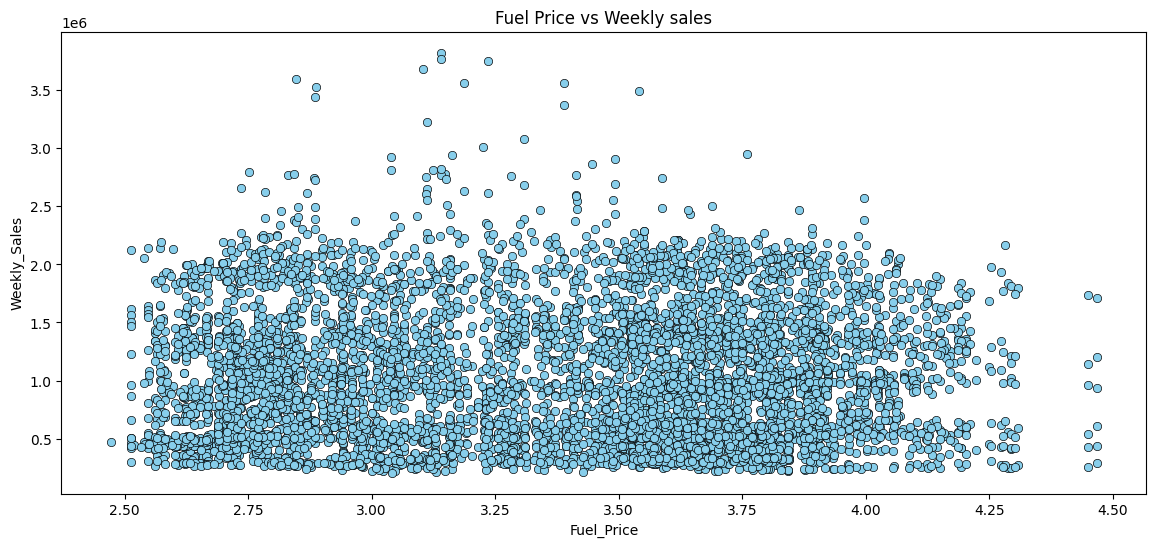

In [124]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = df, x = 'Fuel_Price',y = 'Weekly_Sales',color = 'skyblue',edgecolor = 'black')
plt.title('Fuel Price vs Weekly sales')
plt.show()

### Sales are not affected by fule prices.